# The basics

## Introduction
In this notebook I will try out some of the **fantastic** concepts of Jupyter
Notebooks.

## Markdown basics
Examples of text attributes are:

* *italics*
* **bold**
* `monospace`

Sections can be separated by horizontal lines.

---

Blockquotes can be added, for instance to insert a Monty Python quote:

> Spam!
> Spam!
> Spam!
> Spam!

See [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) for more information.

In [1]:
print("Hello world!")

Hello world!


In [2]:
!ls

environment.yml                references.bib
intermediate                   results
jupyter-tutorial-example.ipynb supplementary_material.ipynb


In [3]:
!head jupyter-tutorial.ipynb

head: jupyter-tutorial.ipynb: No such file or directory


In [4]:
def print_me(str):
    print(str)

In [5]:
print_me("Hi!")

Hi!


# Magics

In [6]:
%load_ext rpy2.ipython

In [7]:
%%R
paste("Hello","World")

[1] "Hello World"


In [8]:
%%latex
\begin{array}{*{20}c} {x = \frac{{ - b \pm \sqrt {b^2 - 4ac} }}{{2a}}} & {{\rm{when}}} & {ax^2 + bx + c = 0} \\ \end{array}

<IPython.core.display.Latex object>

In [9]:
float(100/3)

33.333333333333336

In [10]:
%precision 4

'%.4f'

# Plotting

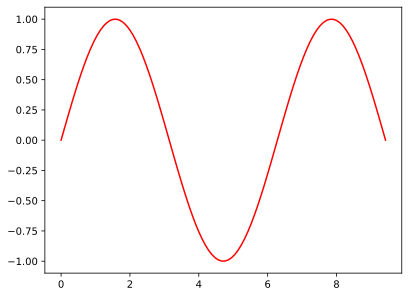

In [11]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
# Generate a set of evenly spaced numbers between 0 and 100
x = np.linspace(0,3*np.pi,100)
# Use the sine function to generate y-values
y = np.sin(x)
# Plot the data
line, = plt.plot(x, y, color='red', linestyle="-")

In [12]:
import seaborn as sns

In [13]:
penguins = sns.load_dataset("penguins")
# Look at first 5 lines of the data
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


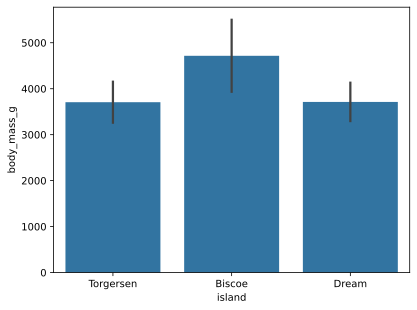

In [14]:
sns.barplot(data=penguins, x="island", y="body_mass_g", errorbar="sd");

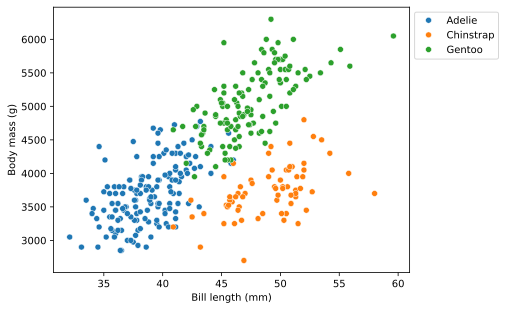

In [15]:
ax = sns.scatterplot(data=penguins, x="bill_length_mm", y="body_mass_g",
                     hue="species")
# Modify the labels of the plot
ax.set_xlabel("Bill length (mm)")
ax.set_ylabel("Body mass (g)")
# Set legend position outside of plot
ax.legend(bbox_to_anchor=(1,1));
plt.savefig("scatterplot.pdf", bbox_inches="tight")

# Widgets

In [16]:
from ipywidgets import interactive, widgets

In [17]:
def scatterplot(x, y, hue, palette, size, color):
    ax = sns.scatterplot(data=penguins, x=x, y=y, hue=hue, palette=palette, s=size)
    ax.set_title("Penguin scatterplot", color=color)

In [18]:
colorpicker = widgets.ColorPicker(
    concise=False,
    description='Title color',
    value='blue',
    disabled=False
)
interactive_scatterplot = interactive(scatterplot, 
            x=["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"], 
            y=["body_mass_g","bill_length_mm","bill_depth_mm","flipper_length_mm"],
            hue=["species","island","sex"],
            palette=["Set1","Set2","Dark2","Paired2"],
            size=(20, 100, 10),
            color=colorpicker)

In [19]:
interactive_scatterplot

interactive(children=(Dropdown(description='x', options=('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm…